<a href="https://colab.research.google.com/github/AbuBakkarSabitth/DataScienceProject/blob/main/beastCancerPredictionbyKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Drive Mount
2. Read CSV
3. Visualisation
4. Preprocessing
5. Dataset Split
Train, Test = 80%, 20%
x(input) , y(Output/class label)

x_train (trainging data input)
y_train (training data output)

x_test (testing data input)
y_test (testing data output class)

6. Model Train
7. Performance Measurement

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset/breast-cancer-wisconsin.data.txt', header = None)

In [ ]:
print(df.head())

        0   1   2   3   4   5   6   7   8   9   10
0  1000025   5   1   1   1   2   1   3   1   1   2
1  1002945   5   4   4   5   7  10   3   2   1   2
2  1015425   3   1   1   1   2   2   3   1   1   2
3  1016277   6   8   8   1   3   4   3   7   1   2
4  1017023   4   1   1   3   2   1   3   1   1   2


In [ ]:
print(df.tail())

         0   1   2   3   4   5  6   7   8   9   10
694  776715   3   1   1   1   3  2   1   1   1   2
695  841769   2   1   1   1   2  1   1   1   1   2
696  888820   5  10  10   3   7  3   8  10   2   4
697  897471   4   8   6   4   3  4  10   6   1   4
698  897471   4   8   8   5   4  5  10   4   1   4


In [ ]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [ ]:
len(df.columns)

11

In [ ]:
col_names = ["Id", "Clump_thickness", "Uniformity_Cell_size", "Uniformity_Cell_Shape", "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei", "Bland_Chormatin", "Normal_Nucleoli","Mitoses", "Class"]

In [ ]:
len(col_names)

11

In [ ]:
df.columns = col_names

In [ ]:
df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chormatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
import numpy as np

print(np.unique(df["Class"]))

[2 4]


In [ ]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chormatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.drop('Id', axis=1, inplace=True)

In [ ]:
df.shape

(699, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chormatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [ ]:
print(np.unique(df["Bare_Nuclei"]))

['1' '10' '2' '3' '4' '5' '6' '7' '8' '9' '?']


In [ ]:
for var in df.columns:
  print(df[var].value_counts())

Clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity_Cell_size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_Cell_Shape
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64
Marginal_Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single_Epithelial_Cell_Size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
Bland_Chormatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
N

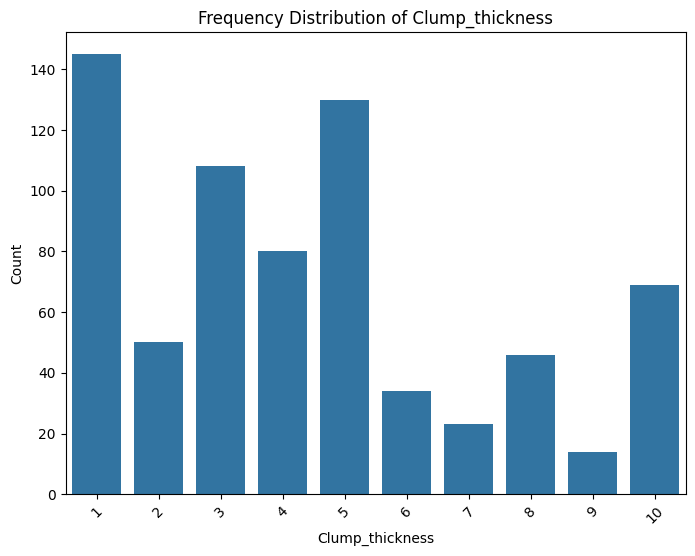

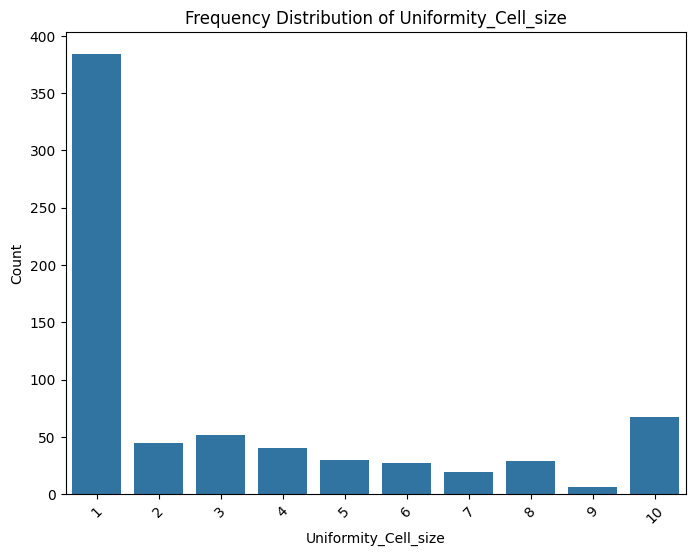

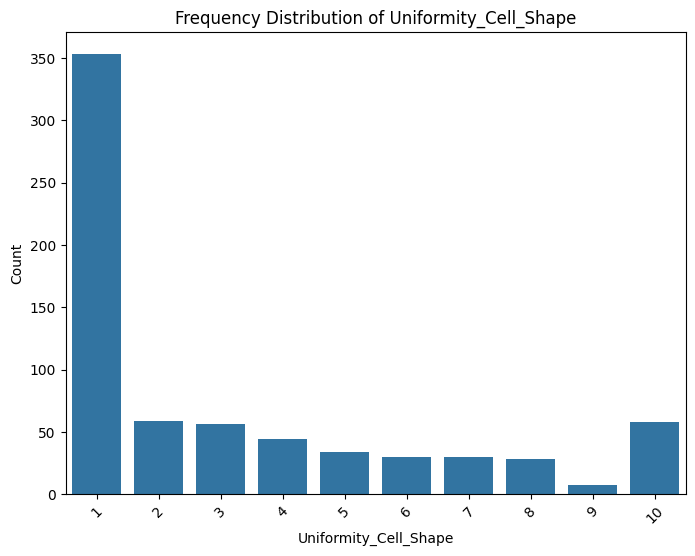

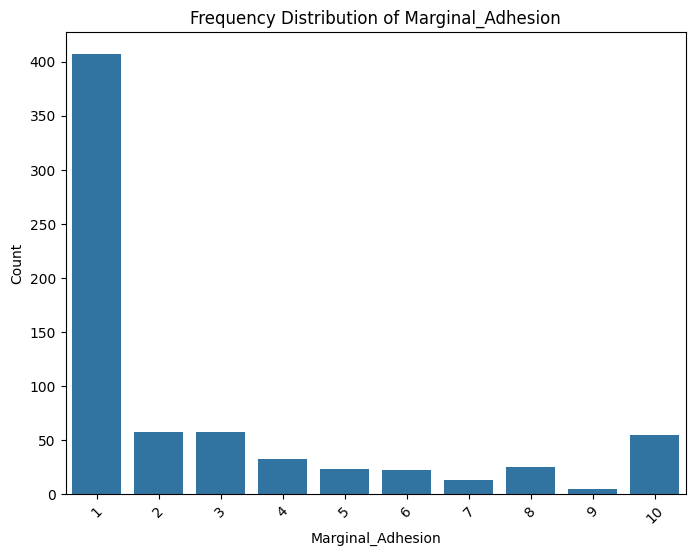

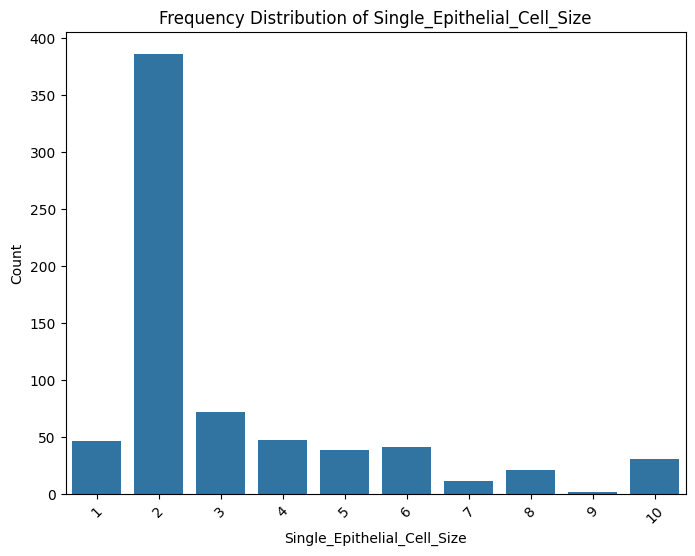

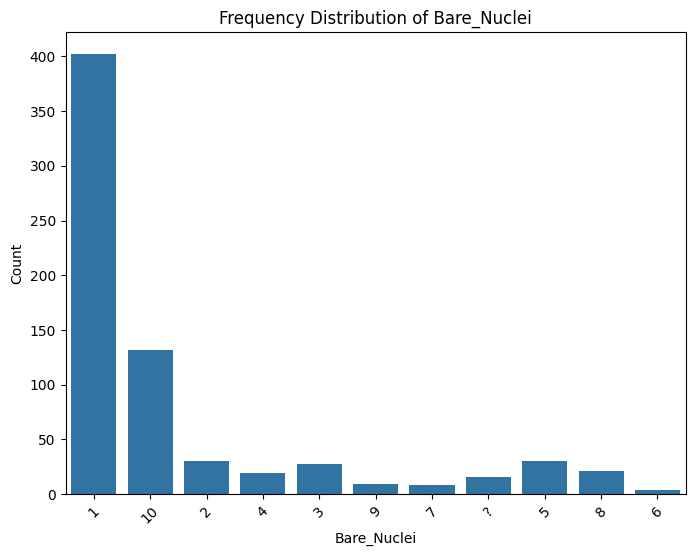

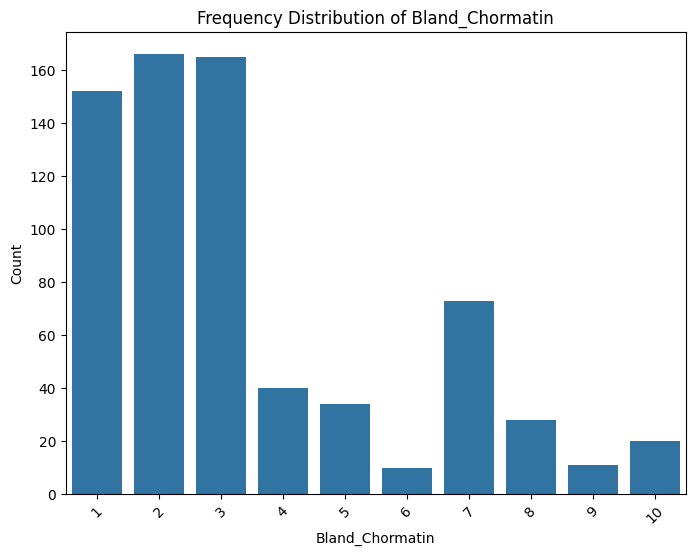

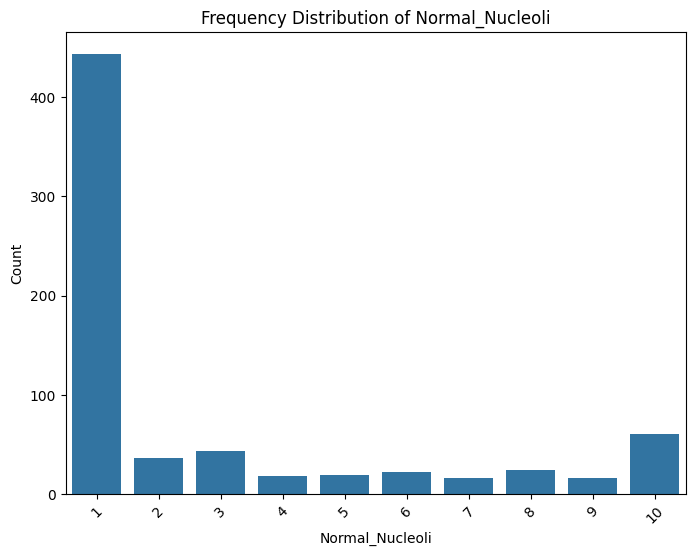

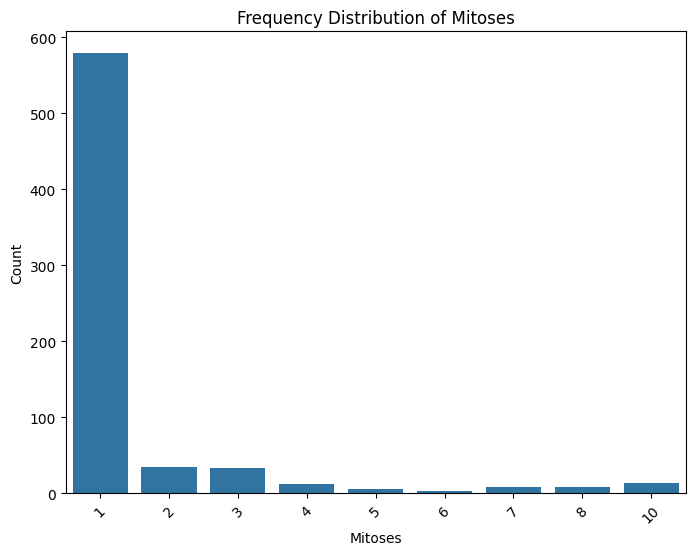

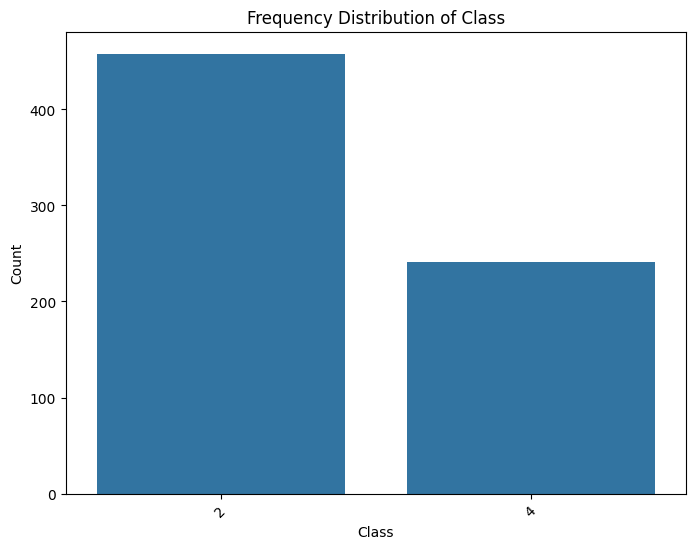

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
  plt.figure(figsize=(8, 6))
  sns.countplot(x = column, data = df)
  plt.title(f'Frequency Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.xticks(rotation= 45)
  plt.show()

In [ ]:
df.head()

,Clump_thickness,Uniformity_Cell_size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chormatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
print(df)

     Clump_thickness  Uniformity_Cell_size  Uniformity_Cell_Shape  \
0                  5                     1                      1   
1                  5                     4                      4   
2                  3                     1                      1   
3                  6                     8                      8   
4                  4                     1                      1   
..               ...                   ...                    ...   
694                3                     1                      1   
695                2                     1                      1   
696                5                    10                     10   
697                4                     8                      6   
698                4                     8                      8   

     Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
0                    1                            2           1   
1                    5               

In [ ]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [ ]:
np.unique(df["Bare_Nuclei"])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan])

In [ ]:
df.dtypes

,0
Clump_thickness,int64
Uniformity_Cell_size,int64
Uniformity_Cell_Shape,int64
Marginal_Adhesion,int64
Single_Epithelial_Cell_Size,int64
Bare_Nuclei,float64
Bland_Chormatin,int64
Normal_Nucleoli,int64
Mitoses,int64
Class,int64


In [ ]:
df.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,16
Bland_Chormatin,0
Normal_Nucleoli,0
Mitoses,0
Class,0


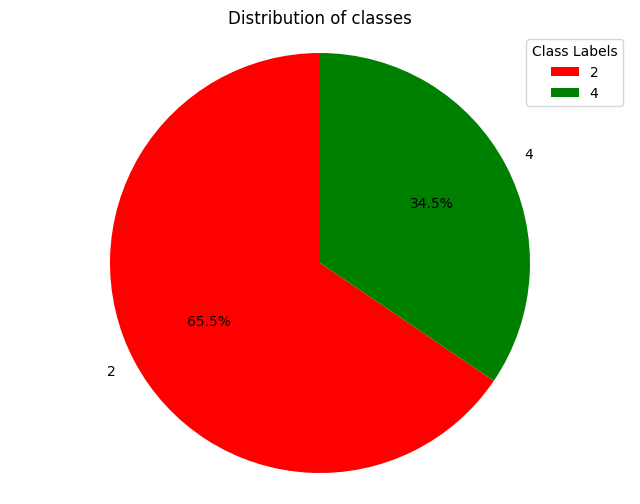

In [ ]:
class_counts = df['Class'].value_counts()
color = ['red', 'green']
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels = class_counts.index, autopct='%1.1f%%', startangle= 90, colors = color)
plt.title('Distribution of classes')
plt.axis('equal')
plt.legend(title='Class Labels', loc = "upper right")
plt.show()


Class Imbalance problem

A 70
B 30

Oversampling : Minor -> increase
Undersampling : Major --> decrease

In [ ]:
print(round(df.describe(), 2))

       Clump_thickness  Uniformity_Cell_size  Uniformity_Cell_Shape  \
count           699.00                699.00                 699.00   
mean              4.42                  3.13                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00                         1.00         1.00   
25%       

A B

Correlation

pair

negatively
positively
zero

A(inc) B(inc) = 1
A(inc) B(inc ~) = [0 - 1]
A(inc) B(dec)


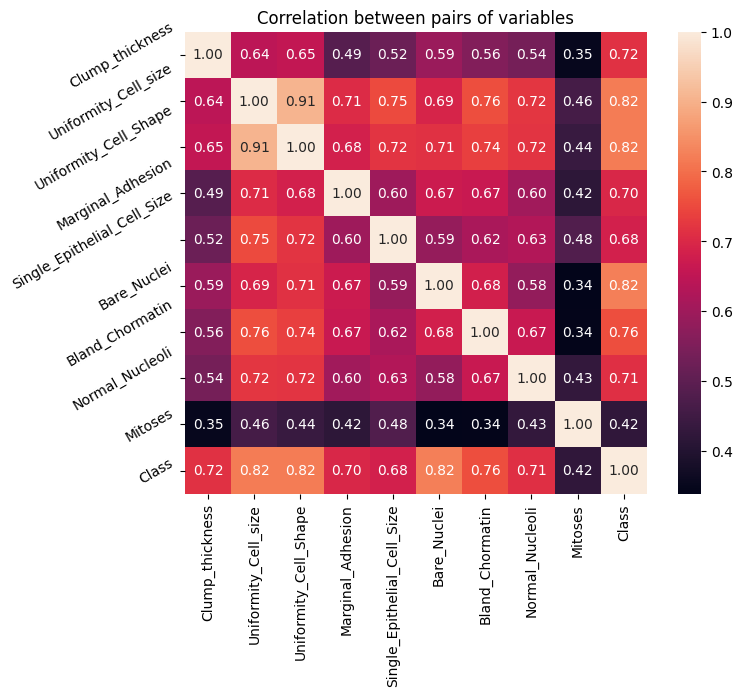

In [ ]:
correlation = df.corr()

plt.figure(figsize=(8, 6))
plt.title('Correlation between pairs of variables')
a = sns.heatmap(correlation, square= True, annot = True, fmt = '.2f', linecolor= 'white')

a.set_xticklabels(a.get_xticklabels(), rotation = 90)
a.set_yticklabels(a.get_yticklabels(), rotation = 30)
plt.show()

In [ ]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape

(559, 9)

In [ ]:
X_test.shape

(140, 9)

In [ ]:
y_test.shape

(140,)

In [ ]:
y_train.shape

(559,)

In [ ]:
X_train.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,9
Bland_Chormatin,0
Normal_Nucleoli,0
Mitoses,0


In [ ]:
X_test.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,7
Bland_Chormatin,0
Normal_Nucleoli,0
Mitoses,0


In [ ]:
for df1 in [X_train, X_test]:
  for col in X_train.columns:
    col_median = X_train[col].median()
    df1[col].fillna(col_median, inplace= True)

<ipython-input-39-64c799f5f793>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(col_median, inplace= True)


In [ ]:
X_train.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,0
Bland_Chormatin,0
Normal_Nucleoli,0
Mitoses,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [ ]:
X_train.head()

,Clump_thickness,Uniformity_Cell_size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chormatin,Normal_Nucleoli,Mitoses
0,-0.869734,-0.723369,-0.754853,-0.300879,-0.556881,-0.720017,-0.214954,-0.632003,-0.355885
1,0.532375,1.570427,1.606250,-0.644828,-0.110898,0.092546,-0.214954,1.303830,-0.355885
2,-1.220261,-0.723369,-0.754853,-0.644828,-1.002865,-0.720017,-0.622273,-0.632003,-0.355885
3,-0.168679,-0.723369,-0.754853,0.043071,-0.556881,-0.720017,-0.214954,-0.632003,-0.355885
4,1.233429,1.242742,1.606250,1.418867,0.781070,0.363400,0.599684,2.271747,0.232694


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
y_pred

array([4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2,
       2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2])

In [ ]:
from sklearn.metrics import accuracy_score
print('Model Test Accuracy: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model Test Accuracy: 0.9500


In [ ]:
print('Model Train Accuracy: {0:0.4f}'.format(knn.score(X_train, y_train)))

Model Train Accuracy: 0.9750


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred5 = knn5.predict(X_test)
print('Model Test Accuracy: {0:0.4f}'.format(accuracy_score(y_test, y_pred5)))

Model Test Accuracy: 0.9571


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn6 = KNeighborsClassifier(n_neighbors=6)
knn6.fit(X_train, y_train)
y_pred6 = knn6.predict(X_test)
print('Model Test Accuracy: {0:0.4f}'.format(accuracy_score(y_test, y_pred6)))

Model Test Accuracy: 0.9571
